In [1]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-ai-w11-p1/Label2Names.csv
/kaggle/input/2021-ai-w11-p1/submission.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0080.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0015.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0066.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0049.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0063.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0020.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0028.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0014.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0054.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0004.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0009.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0021.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/image_0070.csv
/kaggle/input/2021-ai-w11-p1/train_csv_v2/scorpion/im

In [2]:
# 현재 opencv 코드는 3.4.2.17 에 맞춰서 작성되어 있어 버전을 맞추는 작업이 필요하다. 
! yes | pip3 uninstall opencv-python
! yes | pip3 uninstall opencv-contrib-python
! yes | pip3 install opencv-python==3.4.2.17
! yes | pip3 install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.5.4.58
Uninstalling opencv-python-4.5.4.58:
  Would remove:
    /opt/conda/lib/python3.7/site-packages/cv2/*
    /opt/conda/lib/python3.7/site-packages/opencv_python-4.5.4.58.dist-info/*
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libQt5Gui-ba0a2070.so.5.15.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libQt5XcbQpa-ca221f44.so.5.15.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /opt/conda/lib/python3.7/site-packages/opencv_python.libs/libavcodec-64ac49e1.so.58.91.100
    /opt/conda/lib/python3.7/si

In [3]:
import cv2
cv2.__version__

'3.4.2'

In [4]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

In [5]:
torch.manual_seed(777)
torch.cuda.manual_seed_all(777)

device = 'cuda' if torch.cuda.is_available() else 'cpu'



In [6]:
bath_size=100
epoch=5
lr=0.001

In [7]:
dataroot="/kaggle/input/2021-ai-w11-p1/"
csvpath=os.path.join(dataroot,"Label2Names.csv")
df_data=pd.read_csv(csvpath,header=None)
dataroottrain=os.path.join(dataroot,"train_csv_v2")
dataroottest=os.path.join(dataroot,"test_csv_v2")

In [8]:
transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [9]:
# # -------------------------------------
# # 학습데이터, 테스트 데이터 불러오기 
# # -------------------------------------
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader

# class trainDataset(Dataset):
#     def __init__(self, dataroottrain):
        
#         self.trainlabel=[]
#         self.trainpath=[]
#         for classname in tqdm(os.listdir(dataroottrain)):
#             ## class name to index
#             if classname =="BACKGROUND_Google":
#                 labelindex=102
#             else:
#                 labelindex=(df_data.index[df_data[1]==classname]+1).tolist()[0]
            
#             for csvname in os.listdir(os.path.join(dataroottrain,classname)):
#                 self.trainlabel.append(labelindex-1)
#                 ## 데이터 경로 저장 
#                 csvpath=os.path.join(dataroottrain,classname,csvname)
#                 self.trainpath.append(csvpath)

#     def __getitem__(self, idx):
#         ## index 에 해당하는 label 값 과 영상 데이터 받아오기 
#         csvpath=self.trainpath[idx]
#         label=self.trainlabel[idx]
#         ## 1D 데이터를 영상으로 변환 
#         img=np.array(pd.read_csv(csvpath)).reshape((256,256,3))
#         img=img.transpose((2,0,1))
#         ## numpy 데이터를 tensor 형태로 변환 
#         img=torch.from_numpy(img).float()
#         label=torch.tensor(label)
#         return img, label
    
#     def __len__(self):
#         return len(self.trainpath)
    
# class testDataset(Dataset):
#     def __init__(self, dataroottest):

#         self.testlabel=[]
#         self.testpath=[]
#         testsort=sorted(os.listdir(dataroottest))
#         for csvname in tqdm(testsort):
#             ## 영상 경로 저장 
#             csvpath=os.path.join(dataroottest,csvname)
#             self.testpath.append(csvpath)
#             self.testlabel.append(csvname)
            
#     def __getitem__(self, idx):
#         csvpath=self.testpath[idx]
#         label=self.testlabel[idx]
#         ## 1D 데이터를 영상으로 변환 
#         img=np.array(pd.read_csv(csvpath)).reshape((256,256,3))
#         img=img.transpose((2,0,1))
#         ## numpy 데이터를 tensor 형태로 변환 
#         img=torch.from_numpy(img).float()

#         return img,label
    
#     def __len__(self):
#         return len(self.testpath)

In [10]:
# train_data = trainDataset(dataroottrain)
# test_data = testDataset(dataroottest)
# train_loader = DataLoader(train_data, batch_size=16, shuffle=False, num_workers=16)
# test_loader = DataLoader(test_data, batch_size=16, shuffle=False, num_workers=4)

In [11]:
# images, labels = next(iter(train_loader))
# grid_img = torchvision.utils.make_grid(images, nrow=5)
# print(labels)
# plt.imshow(grid_img.permute(1, 2, 0))

In [12]:
class trainDataset(Dataset):
    def __init__(self, dataroottrain, transforms=None):
        
        self.trainlabel=[]
        self.trainpath=[]
        
        for classname in tqdm(os.listdir(dataroottrain)):
            ## class name to index
            if classname =="BACKGROUND_Google":
                labelindex=102
            else:
                labelindex=(df_data.index[df_data[1]==classname]+1).tolist()[0]
            
            for csvname in os.listdir(os.path.join(dataroottrain,classname)):
                self.trainlabel.append(labelindex-1)
                ## 데이터 경로 저장 
                csvpath=os.path.join(dataroottrain,classname,csvname)
                self.trainpath.append(csvpath)
        self.transforms = transforms

    def __getitem__(self, idx):
        ## index 에 해당하는 label 값 과 영상 데이터 받아오기 
        csvpath=self.trainpath[idx]
        label=self.trainlabel[idx]
        ## 1D 데이터를 영상으로 변환 
        img=np.array(pd.read_csv(csvpath)).astype(np.uint8).reshape((256,256,3))
        img=img[:,:,[2,1,0]]
        if self.transforms:
            img = self.transforms(img)
        return img, label
    
    def __len__(self):
        return len(self.trainpath)
    
class testDataset(Dataset):
    def __init__(self, dataroottest, transforms=None):

        self.testlabel=[]
        self.testpath=[]
        testsort=sorted(os.listdir(dataroottest))
        for csvname in tqdm(testsort):
            ## 영상 경로 저장 
            csvpath=os.path.join(dataroottest,csvname)
            self.testpath.append(csvpath)
            self.testlabel.append(csvname)
        self.transforms = transforms
            
    def __getitem__(self, idx):
        csvpath=self.testpath[idx]
        label=self.testlabel[idx]
        ## 1D 데이터를 영상으로 변환 
        img=np.array(pd.read_csv(csvpath)).astype(np.uint8).reshape((256,256,3))
        img=img[:,:,[2,1,0]]
        if self.transforms:
            img = self.transforms(img)

        return img,label
    
    def __len__(self):
        return len(self.testpath)

In [13]:
train_data = trainDataset(dataroottrain, transform)
test_data = testDataset(dataroottest, transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, num_workers=16)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False, num_workers=4)

100%|██████████| 1712/1712 [00:00<00:00, 314706.07it/s]
/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([98, 44, 66,  0, 21, 80, 20, 99, 93, 28,  1, 34, 14, 14, 51, 84])


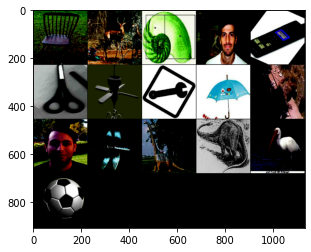

In [14]:
images, labels = next(iter(train_loader))
grid_img = torchvision.utils.make_grid(images, nrow=5)
print(labels)
plt.imshow(grid_img.permute(1, 2, 0))

('img_00000.csv', 'img_00001.csv', 'img_00002.csv', 'img_00003.csv', 'img_00004.csv', 'img_00005.csv', 'img_00006.csv', 'img_00007.csv', 'img_00008.csv', 'img_00009.csv', 'img_00010.csv', 'img_00011.csv', 'img_00012.csv', 'img_00013.csv', 'img_00014.csv', 'img_00015.csv')


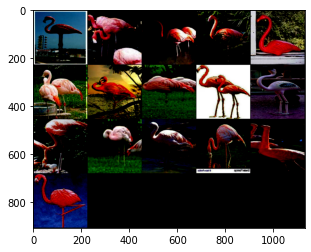

In [15]:
images2, labels2 = next(iter(test_loader))
grid_img2 = torchvision.utils.make_grid(images2, nrow=5)
print(labels2)
plt.imshow(grid_img2.permute(1, 2, 0))

In [16]:
vgg19=models.vgg19(pretrained=True)
vgg19.to(device)

print(vgg19)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [17]:
# change the number of classes 
vgg19.classifier[6].out_features = 102
 
# freeze convolution weights
for param in vgg19.features.parameters():
    param.requires_grad = False

In [18]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.classifier.parameters(), lr=0.001)

In [19]:
def train(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
#         loss.requires_grad = True
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/len(train_dataloader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
 
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')
    
    return train_loss, train_accuracy

In [20]:
train_loss , train_accuracy = [], []
for epoch in range(2):
    train_epoch_loss, train_epoch_accuracy = train(vgg19, train_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
print(train_accuracy)

Train Loss: 0.2444, Train Acc: 24.80
Train Loss: 0.1429, Train Acc: 62.71
[24.80392156862745, 62.712418300653596]


In [21]:
predictions = []

with torch.no_grad():
    vgg19.eval()
    predictions=[]
    for int, data in enumerate(test_loader):
        data = data[0].to(device)
        output = vgg19(data)
        _, preds = torch.max(output.data, 1)
        predictions.append(preds.cpu().numpy())

In [22]:
#print(predictions)
p=np.concatenate(predictions).reshape(-1,1)+1
print(p.shape)
print(p)

(1712, 1)
[[42]
 [42]
 [42]
 ...
 [98]
 [44]
 [98]]


[[97]
 [19]
 [97]
 [19]
 [19]
 [97]
 [97]
 [97]
 [97]
 [97]
 [97]
 [97]
 [98]
 [98]
 [44]
 [98]]


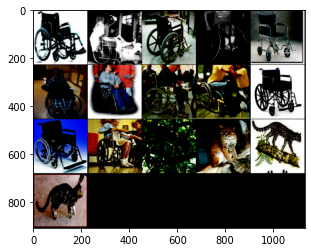

In [23]:
# images2, labels2 = next(iter(test_loader))
for check, dat in enumerate(iter(test_loader)):
    if check == 106:
        images2, labels2 = dat
grid_img2 = torchvision.utils.make_grid(images2, nrow=5)
print(p[-16:])
plt.imshow(grid_img2.permute(1, 2, 0))

In [24]:
submit=pd.read_csv('/kaggle/input/2021-ai-w11-p1/submission.csv')
submit

,Id,Category
0,img_00000.csv,42
1,img_00001.csv,42
2,img_00002.csv,42
3,img_00003.csv,42
4,img_00004.csv,42
...,...,...
1707,img_01707.csv,42
1708,img_01708.csv,42
1709,img_01709.csv,42
1710,img_01710.csv,42


In [25]:
submit.Category=p
submit

,Id,Category
0,img_00000.csv,42
1,img_00001.csv,42
2,img_00002.csv,42
3,img_00003.csv,42
4,img_00004.csv,43
...,...,...
1707,img_01707.csv,97
1708,img_01708.csv,98
1709,img_01709.csv,98
1710,img_01710.csv,44


In [26]:
submit.to_csv('submission.csv',index=False,mode='w')